In [1]:
!pip install nltk
!pip install Wordcloud

In [2]:
import nltk
import numpy
import string
import matplotlib.pyplot as plt
from nltk.probability import FreqDist

import nltk
from nltk.collocations import *

bigram_measures = nltk.collocations.BigramAssocMeasures()
trigram_measures = nltk.collocations.TrigramAssocMeasures()
fourgram_measures = nltk.collocations.QuadgramAssocMeasures()

In [3]:
file_name = "Glencairn_Description_2022.txt"  # in R here + data inaugural_speech...

my_file = open(file_name, encoding="utf8") # open the file. 
description = my_file.read() # read content of it and put them in a variable
my_file.close() # close the file

# after that you have access to that file as text in the speech variable you created
print("number of characters:", len(description))
print("-------------------------------------------------------------------------------------------------")
print(description[:500]) # first 500 words

number of characters: 94364
-------------------------------------------------------------------------------------------------
Chamvin标准闻香杯威士忌酒杯ISO杯苏格兰水晶格兰品酒凯恩杯彩盒
高脚标准闻香杯威士忌酒杯ISO杯苏格兰水晶格兰品酒凯恩杯甜酒杯
Customized Hot Sale 250ml Whisky Glass Cup Glencairn Whiskey Glass Tumbler Drink Gold Rim Glass With Ripples
7.8 Once Perfect Whisky Glass For Liquor Or Bourbon Tumblers Whiskeyscotch Glasses Set Of 2.
Crystal Whiskey Scotch Glasses Hand Cut Customized Engraved Whisky Toasting Tasting Wine Cup Bourbon Liquor Glasses Tumbler
7oz 8oz German Europe Hot Selling Wholesale Clear Jameson Beer Glasses Scotchland Whisky Glass Set For Cus


In [4]:
from nltk.tokenize import word_tokenize
nltk.download('punkt')

[nltk_data] Downloading package punkt to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [5]:
description_tokens = word_tokenize(description)
lower_description_tokens = [word.lower() for word in description_tokens] 
print(lower_description_tokens[0:50])

['chamvin标准闻香杯威士忌酒杯iso杯苏格兰水晶格兰品酒凯恩杯彩盒', '高脚标准闻香杯威士忌酒杯iso杯苏格兰水晶格兰品酒凯恩杯甜酒杯', 'customized', 'hot', 'sale', '250ml', 'whisky', 'glass', 'cup', 'glencairn', 'whiskey', 'glass', 'tumbler', 'drink', 'gold', 'rim', 'glass', 'with', 'ripples', '7.8', 'once', 'perfect', 'whisky', 'glass', 'for', 'liquor', 'or', 'bourbon', 'tumblers', 'whiskeyscotch', 'glasses', 'set', 'of', '2', '.', 'crystal', 'whiskey', 'scotch', 'glasses', 'hand', 'cut', 'customized', 'engraved', 'whisky', 'toasting', 'tasting', 'wine', 'cup', 'bourbon', 'liquor']


In [6]:
from nltk.text import Text

text_of_the_description = Text(lower_description_tokens)
print("LIEWOOD", text_of_the_description.concordance("LIEWOOD", lines = 1))
print('silicone', text_of_the_description.concordance('silicone', lines = 1))
print('6Pcs Beach Toy Set', text_of_the_description.concordance('6Pcs Beach Toy Set', lines = 1))
print('SILICONE BUCKET', text_of_the_description.concordance('SILICONE BUCKET', lines = 1))
print('beach', text_of_the_description.concordance('beach', lines = 1))
print('丹麦', text_of_the_description.concordance('丹麦', lines = 1))
print('ins原单', text_of_the_description.concordance('ins原单', lines = 1))
print('organic', text_of_the_description.concordance('organic', lines = 1))
print('sand', text_of_the_description.concordance('sand', lines = 1))

no matches
LIEWOOD None
no matches
silicone None
no matches
6Pcs Beach Toy Set None
no matches
SILICONE BUCKET None
no matches
beach None
no matches
丹麦 None
no matches
ins原单 None
no matches
organic None
no matches
sand None


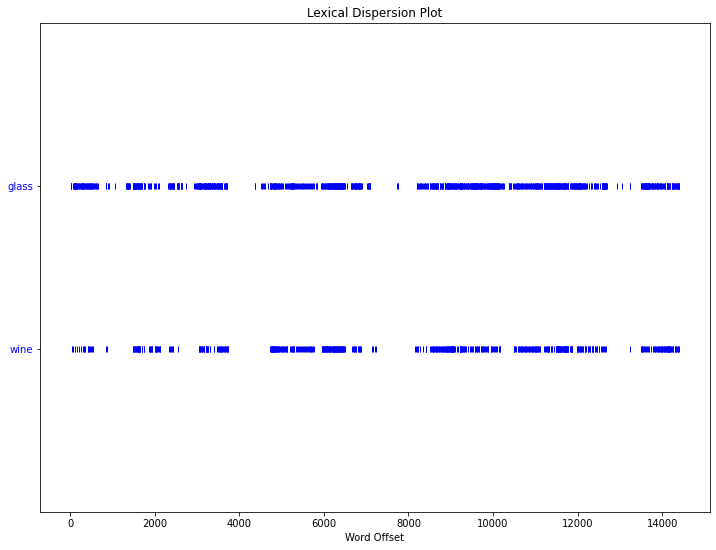

In [7]:
from nltk.draw.dispersion import dispersion_plot

plt.figure(figsize=(12, 9))

targets =['glass','wine']
dispersion_plot(text_of_the_description, targets, ignore_case=True, title='Lexical Dispersion Plot')

In [8]:
nltk.download('stopwords')
from nltk.corpus import stopwords

#let's have a look what are the words usually discarded:
extra_punctuation_to_remove = ['.', '..','...','....','.....','......', ').', '.,', "''"]
individual_letters = list(string.ascii_lowercase)
some_more_words_to_remove = [",","-",")"]


[nltk_data] Downloading package stopwords to /home/studio-lab-
[nltk_data]     user/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [9]:
remove_these = set(stopwords.words('english') + list(string.punctuation) + list(string.digits) + extra_punctuation_to_remove + individual_letters + some_more_words_to_remove)

filtered_text = [word 
                 for word in text_of_the_description 
                 if not word in remove_these]

# note: above broken-down 3-line version could be a one-liner (see below). 
# it's up to you, which format you prefer. above, or this:
# filtered_text = [word for word in corpus_tokens if not word in remove_these]

fdist_filtered = FreqDist(filtered_text)

In [10]:
from nltk.probability import FreqDist

fdist_filtered.most_common(100)

[('glass', 1070),
 ('wine', 603),
 ('cup', 461),
 ('whiskey', 410),
 ('crystal', 340),
 ('de', 332),
 ('whisky', 306),
 ('set', 273),
 ('tasting', 270),
 ('glasses', 263),
 ('tulip', 221),
 ('beer', 116),
 ('color', 101),
 ('brandy', 99),
 ('professional', 96),
 ('verre', 95),
 ('drinking', 90),
 ('glassware', 88),
 ('vino', 78),
 ('cocktail', 71),
 ('cups', 70),
 ('iso', 70),
 ('cristal', 70),
 ('di', 69),
 ('clear', 68),
 ('smelling', 66),
 ('drink', 65),
 ('lead-free', 65),
 ('scent', 65),
 ('sweet', 62),
 ('bourbon', 61),
 ('glencairn', 57),
 ('scotch', 55),
 ('vidrio', 54),
 ('200ml', 53),
 ('bar', 53),
 ('goblet', 52),
 ('aroma', 50),
 ('size', 50),
 ('à', 49),
 ('transparent', 48),
 ('copa', 48),
 ('ml', 47),
 ('red', 45),
 ('6.5oz', 43),
 ('gift', 41),
 ('vasos', 41),
 ('foreign', 41),
 ('liquor', 40),
 ('pure', 38),
 ('bicchiere', 38),
 ('tumblers', 37),
 ('fragrance-smelling', 36),
 ('vaso', 35),
 ('liqueur', 35),
 ('tumbler', 34),
 ('custom', 34),
 ('coffee', 33),
 ('vetro',

In [11]:
# bigram_measures = BigramAssocMeasures()
# finder = BigramCollocationFinder.from_words(text_of_the_description, 5)
word_fd = nltk.FreqDist(filtered_text)
bigram_fd = nltk.FreqDist(nltk.bigrams(filtered_text))
finder = BigramCollocationFinder(word_fd, bigram_fd)
scored = finder.score_ngrams(bigram_measures.raw_freq)

In [12]:
sorted(finder.nbest(bigram_measures.raw_freq, 10))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('wine', 'glass'), 177),
 (('crystal', 'glass'), 109),
 (('tasting', 'glass'), 108),
 (('glass', 'whiskey'), 105),
 (('whiskey', 'glass'), 101),
 (('glass', 'tulip'), 82),
 (('tasting', 'cup'), 81),
 (('glass', 'set'), 74),
 (('wine', 'glasses'), 67),
 (('glass', 'cup'), 64),
 (('wine', 'cup'), 59),
 (('whisky', 'glass'), 55),
 (('tulip', 'glass'), 54),
 (('whiskey', 'glasses'), 52),
 (('wine', 'tasting'), 50),
 (('de', 'cristal'), 49),
 (('cup', 'set'), 48),
 (('cup', 'whiskey'), 48),
 (('glass', 'tasting'), 48),
 (('sweet', 'wine'), 48)]

In [13]:
finder = TrigramCollocationFinder.from_words(filtered_text)
scored = finder.score_ngrams(trigram_measures.raw_freq)

In [14]:
sorted(finder.nbest(trigram_measures.raw_freq, 10))
sorted(finder.ngram_fd.items(), key=lambda t: (-t[1], t[0]))[:20]

[(('color', 'size', '200ml'), 40),
 (('glass', 'tasting', 'glass'), 35),
 (('brandy', 'tulip', 'aroma'), 34),
 (('glass', 'cup', 'set'), 31),
 (('wine', 'red', 'wine'), 30),
 (('professional', 'tasting', 'glass'), 29),
 (('crystal', 'whiskey', 'glass'), 28),
 (('whiskey', 'glasses', 'set'), 28),
 (('aroma', 'professional', 'tasting'), 27),
 (('coffee', 'glassware', 'clear'), 27),
 (('crystal', 'glass', 'cup'), 27),
 (('cup', 'set', '6.5oz'), 27),
 (('scent', 'wine', 'cup'), 27),
 (('set', '6.5oz', 'glass'), 27),
 (('smelling', 'crystal', 'cup'), 27),
 (('tasting', 'glass', 'goblet'), 27),
 (('wine', 'coffee', 'glassware'), 27),
 (('wine', 'cup', 'brandy'), 27),
 (('wine', 'glass', 'tasting'), 27),
 (('6-piece', 'crystal', 'glass'), 26)]

[('glass', 1070), ('wine', 603), ('cup', 461), ('whiskey', 410), ('crystal', 340), ('de', 332), ('whisky', 306), ('set', 273), ('tasting', 270), ('glasses', 263), ('tulip', 221), ('beer', 116), ('color', 101), ('brandy', 99), ('professional', 96), ('verre', 95), ('drinking', 90), ('glassware', 88), ('vino', 78), ('cocktail', 71), ('cups', 70), ('iso', 70), ('cristal', 70), ('di', 69), ('clear', 68), ('smelling', 66), ('drink', 65), ('lead-free', 65), ('scent', 65), ('sweet', 62)]


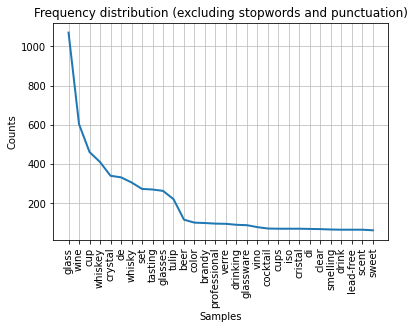

<AxesSubplot:title={'center':'Frequency distribution (excluding stopwords and punctuation)'}, xlabel='Samples', ylabel='Counts'>

In [15]:
print(fdist_filtered.most_common(30))
fdist_filtered.plot(30,title='Frequency distribution (excluding stopwords and punctuation)')

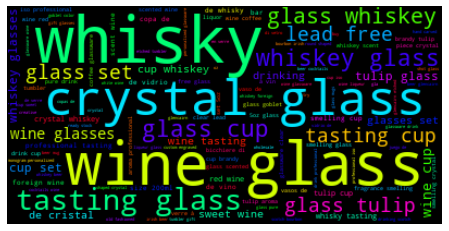

In [16]:
from wordcloud import WordCloud
%matplotlib inline
import matplotlib.pyplot as plt
cloud = WordCloud(max_font_size=60,colormap="hsv").generate(' '.join(text_of_the_description)) # generate function?
plt.rcParams["figure.figsize"] = (8,4)
plt.imshow(cloud, interpolation='bilinear')
plt.axis('off')
plt.show()